In [115]:
import pandas as pd

df = pd.read_csv("cleaned_movies.csv")
df = df.dropna()

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_data = df[['popularity', 'vote_average', 'vote_count']]

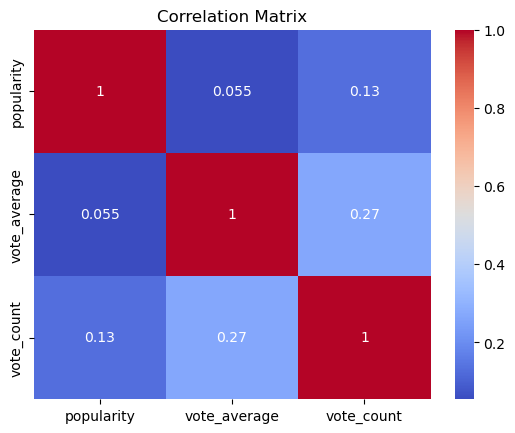

In [117]:
corr = corr_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [118]:
summary = df.describe()
print(summary)

                 id   popularity    vote_count  vote_average
count  9.921000e+03  9921.000000   9921.000000   9921.000000
mean   3.437579e+05    45.439499   1692.436347      6.405755
std    3.930409e+05   103.568193   3184.343357      1.242282
min    1.100000e+01    19.183000      0.000000      0.000000
25%    1.277900e+04    22.604000    127.000000      5.969000
50%    1.504210e+05    28.430000    507.000000      6.530000
75%    5.957430e+05    42.589000   1741.000000      7.109000
max    1.382217e+06  4533.723000  36502.000000     10.000000


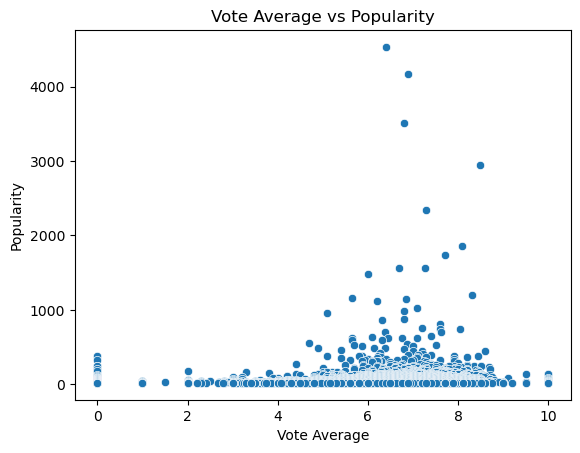

In [119]:
sns.scatterplot(data = df, x = 'vote_average', y = 'popularity')
plt.title("Vote Average vs Popularity")
plt.xlabel("Vote Average")
plt.ylabel("Popularity")
plt.show()

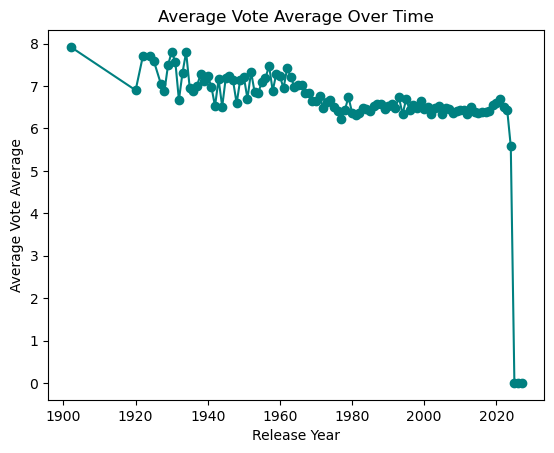

In [120]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
popularity_trend = df.groupby('release_year')['vote_average'].mean()
popularity_trend.plot(kind='line', marker='o', color='teal')
plt.title("Average Vote Average Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Vote Average")
plt.show()

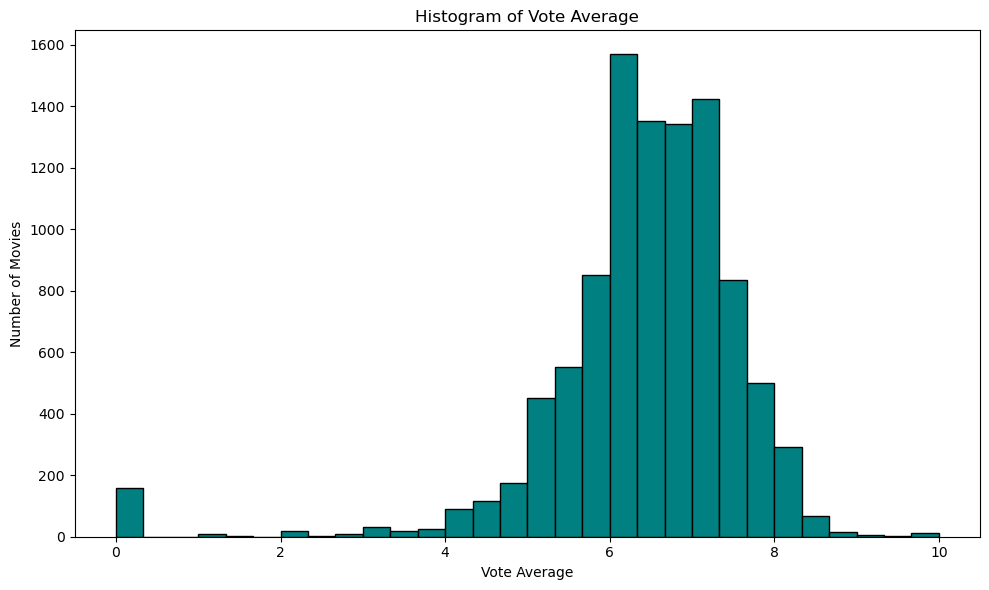

In [121]:
plt.figure(figsize=(10, 6))
plt.hist(df['vote_average'], bins=30, color='teal', edgecolor='black')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.title('Histogram of Vote Average')
plt.tight_layout()
plt.show()

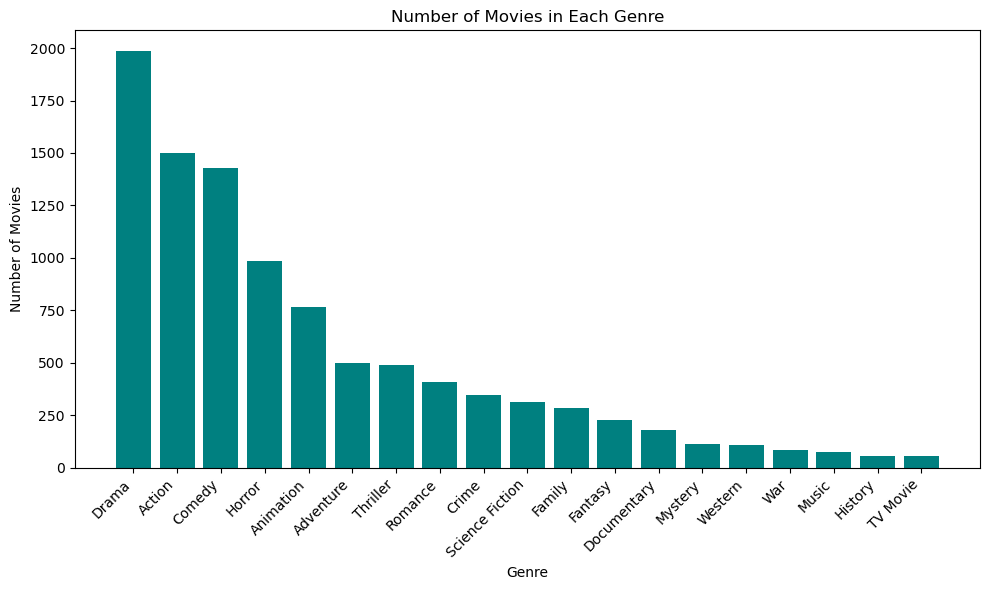

In [122]:
counts = df['primary_genre'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='teal')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

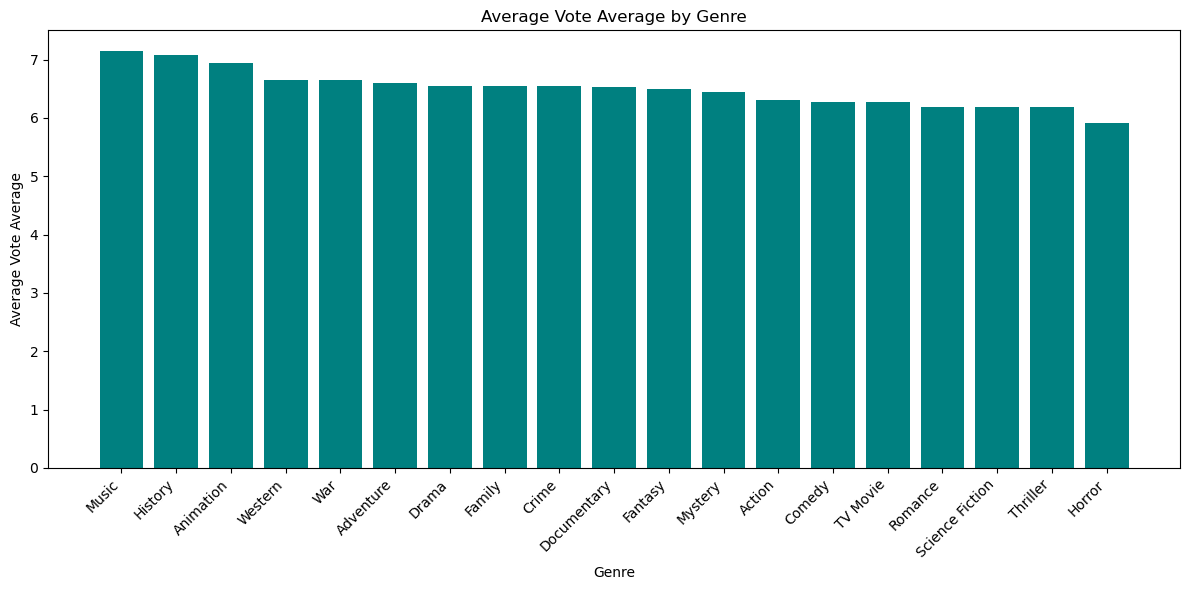

In [123]:
genre_vote_avg = df.groupby('primary_genre')['vote_average'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(genre_vote_avg.index, genre_vote_avg.values, color='teal')
plt.xlabel('Genre')
plt.ylabel('Average Vote Average')
plt.title('Average Vote Average by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

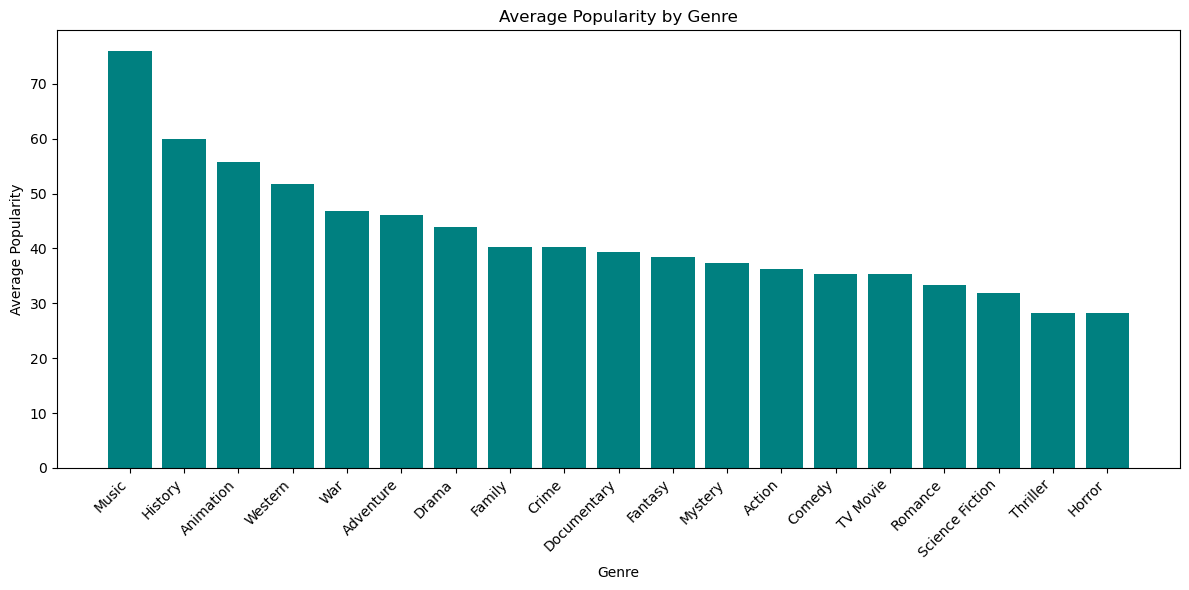

In [124]:
genre_pop_avg = df.groupby('primary_genre')['popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(genre_vote_avg.index, genre_pop_avg.values, color='teal')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [125]:
import pandas as pd
mean_popularity_by_genre = df.groupby('primary_genre')['popularity'].mean()
ranked_genres = mean_popularity_by_genre.sort_values(ascending=False)
print(ranked_genres)

primary_genre
Science Fiction    75.946256
Animation          59.998969
Action             55.690264
Horror             51.689281
Fantasy            46.786322
Adventure          46.162659
Romance            43.854061
Family             40.315518
Thriller           40.235761
Drama              39.277695
Crime              38.345011
War                37.371595
History            36.248483
TV Movie           35.385000
Comedy             35.353624
Mystery            33.252678
Western            31.854339
Music              28.275064
Documentary        28.250209
Name: popularity, dtype: float64


In [126]:

import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Convert 'release_date' to datetime and extract the year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  # Coerce will handle invalid dates
df['year'] = df['release_date'].dt.year  # Extract the year from release_date

# Function to update the plot based on year selection
def update_genre_plot(year):
    # Filter the dataframe for the selected year
    filtered_df = df[df['year'] == year]
    
    # Check if filtered_df is empty
    if filtered_df.empty:
        print(f"No data available for the year {year}.")
        return
    
    # Calculate the average popularity by genre for the selected year
    genre_popularity = filtered_df.groupby('primary_genre')['popularity'].mean().sort_values(ascending=False).head(5)
    
    # Create a bar chart
    fig = px.bar(genre_popularity, x=genre_popularity.index, y=genre_popularity.values,
                 labels={'x': 'Genre', 'y': 'Average Popularity'},
                 title=f'Most Popular Genres in {year}',
                 color_discrete_sequence=['#008080'])
    fig.show()

# Create an interactive widget for selecting the year
year_widget = widgets.IntSlider(min=df['year'].min(), max=df['year'].max(), step=1, value=df['year'].min(), 
                                 description="Select Year:")

# Link the widget to the update function
interact(update_genre_plot, year=year_widget)


interactive(children=(IntSlider(value=1902, description='Select Year:', max=2027, min=1902), Output()), _dom_c…

<function __main__.update_genre_plot(year)>

In [127]:
from ipywidgets import widgets
import plotly.express as px

# Function to plot the filtered bar chart based on genre and popularity
def plot_filtered_bar(genre_filter):
    # Filter the dataframe for the selected genre
    filtered_df = df[df['primary_genre'] == genre_filter]
    
    # Sort the filtered data by popularity (descending)
    sorted_df = filtered_df.sort_values(by='popularity', ascending=False)
    
    # Create a bar chart with the sorted data
    fig = px.bar(sorted_df.head(10), x='title', y='popularity', color='primary_genre', 
                 title=f"Top 10 Most Popular Movies in {genre_filter} Genre", 
                 labels={'popularity': 'Popularity', 'title': 'Movie Title'},
                 color_discrete_sequence=['#008080'])
    fig.show()

# Create an interactive widget to select genre
genre_widget = widgets.Dropdown(
    options=df['primary_genre'].unique(),
    description="Genre:",
    disabled=False
)

# Link the widget to the plot function
widgets.interactive(plot_filtered_bar, genre_filter=genre_widget)

interactive(children=(Dropdown(description='Genre:', options=('Science Fiction', 'Horror', 'Drama', 'Animation…